In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class equalizing_diff:
    """
    A class of the equalizing difference model
    """
    
    def __init__(self, R, T, γ_h, γ_c, w_h0, D=0, π=None):
        # one switches to the weak model by setting π
        self.R, self.γ_h, self.γ_c, self.w_h0, self.D = R, γ_h, γ_c, w_h0, D
        self.T, self.π = T, π
    
    def compute_gap(self):
        R, γ_h, γ_c, w_h0, D = self.R, self.γ_h, self.γ_c, self.w_h0, self.D
        T, π = self.T, self.π
        
        A_h = (1 - (γ_h/R)**(T+1)) / (1 - γ_h/R)
        A_c = (1 - (γ_c/R)**(T-3)) / (1 - γ_c/R) * (γ_c/R)**3
        
        # tweaked model
        if π!=None:
            A_c = π*A_c 
        
        ϕ = A_h/A_c + D/(w_h0*A_c)
        return ϕ

In [3]:
# ϕ_R
def ϕ_R(mc, R_new):
    mc_new = equalizing_diff(R_new, mc.T, mc.γ_h, mc.γ_c, mc.w_h0, mc.D, mc.π)
    return mc_new.compute_gap()

ϕ_R = np.vectorize(ϕ_R)

# ϕ_γh
def ϕ_γh(mc, γh_new):
    mc_new = equalizing_diff(mc.R, mc.T, γh_new, mc.γ_c, mc.w_h0, mc.D, mc.π)
    return mc_new.compute_gap()

ϕ_γh = np.vectorize(ϕ_γh)

# ϕ_γc
def ϕ_γc(mc, γc_new):
    mc_new = equalizing_diff(mc.R, mc.T, mc.γ_h, γc_new, mc.w_h0, mc.D, mc.π)
    return mc_new.compute_gap()

ϕ_γc = np.vectorize(ϕ_γc)

# ϕ_π
def ϕ_π(mc, π_new):
    mc_new = equalizing_diff(mc.R, mc.T, mc.γ_h, mc.γ_c, mc.w_h0, mc.D, π_new)
    return mc_new.compute_gap()

ϕ_π = np.vectorize(ϕ_π)

In [4]:
# set benchmark parameters
R = 1.05
T = 40
γ_h, γ_c = 1.01, 1.02
w_h0 = 1
D = 2

# create an instance
ex1 = equalizing_diff(R=R, T=T, γ_h=γ_h, γ_c=γ_c, w_h0=w_h0, D=D)
gap1 = ex1.compute_gap()

print(gap1)

1.085398977637394


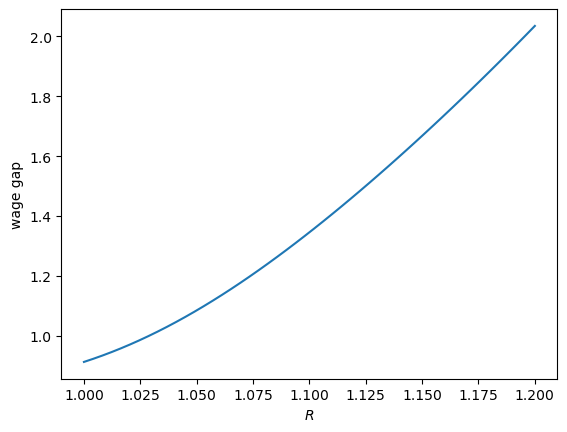

In [5]:
R_arr = np.linspace(1, 1.2, 50)
plt.plot(R_arr, φ_R(ex1, R_arr))
plt.xlabel(r'$R$')
plt.ylabel(r'wage gap')
plt.show()

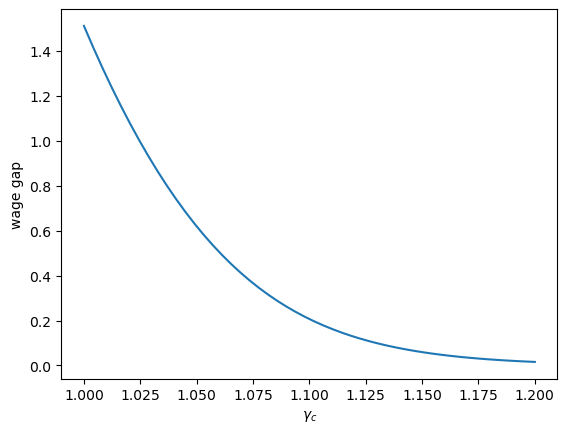

In [6]:
γc_arr = np.linspace(1, 1.2, 50)
plt.plot(γc_arr, φ_γc(ex1, γc_arr))
plt.xlabel(r'$\gamma_c$')
plt.ylabel(r'wage gap')
plt.show()

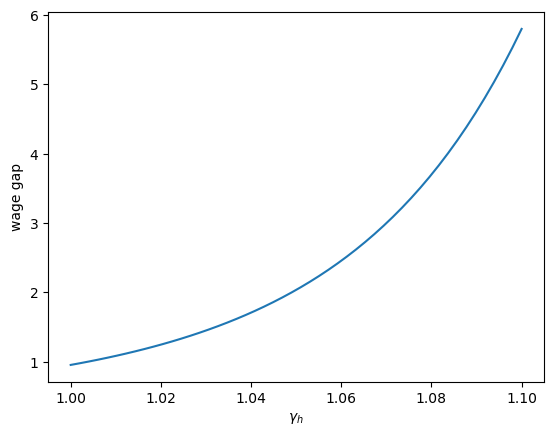

In [7]:
γh_arr = np.linspace(1, 1.1, 50)
plt.plot(γh_arr, φ_γh(ex1, γh_arr))
plt.xlabel(r'$\gamma_h$')
plt.ylabel(r'wage gap')
plt.show()

In [8]:
# free college
ex2 = equalizing_diff(R, T, γ_h, γ_c, w_h0, D=0)
gap2 = ex2.compute_gap()

print(gap2)

0.9906455257282295


In [9]:
# a model of enterpreneur
ex3 = equalizing_diff(R, T, γ_h, γ_c, w_h0, π=0.8)
gap3 = ex3.compute_gap()

print(gap3)

1.2383069071602868


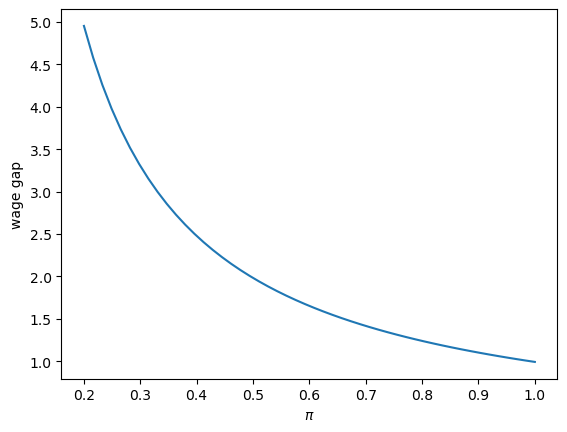

In [10]:
π_arr = np.linspace(0.2, 1, 50)
plt.plot(π_arr, φ_π(ex3, π_arr))
plt.ylabel(r'wage gap')
plt.xlabel(r'$\pi$')
plt.show()